#1. Regression 리뷰

In [1]:
!pip install rfpimp

  Preparing metadata (setup.py) ... done
  Created wheel for rfpimp: filename=rfpimp-1.3.7-py3-none-any.whl size=10649 sha256=5b7844f81773aa8e0797dec9ebea29ddd9dec5e42a5033b322e887dd986ce5bf
  Stored in directory: /root/.cache/pip/wheels/8a/47/c9/053e734c43f85fa336b795eca6fef84c824595d5d21cdb96d5
Successfully built rfpimp


- CNC 데이터
 - Passorfail: 1 또는 0


In [3]:
import pandas as pd

In [35]:
df = pd.read_csv("정밀가공_품질보증_데이터셋.csv")

In [36]:
df.head()

,SerialNo,ReceivedDateTime,SpindleSpeed_max,ServoCurrent_X_max,ServoCurrent_Z1_max,ServoCurrent_Z2_max,ServoCurrent_Z3_max,ServoLoad_X_max,ServoLoad_Z1_max,ServoLoad_Z2_max,...,ServoCurrent_Z3_std,ServoLoad_X_std,ServoLoad_Z1_std,ServoLoad_Z2_std,ServoLoad_Z3_std,SpindleLoad_max,SpindleLoad_mean,SpindleLoad_min,SpindleLoad_std,passorfail
0,20220823-0000185,2022-08-23 03:14:36.906,2227.05,1429.15,1364.51,30.3,4188.47,118.17,85.85,30.3,...,482.595381,19.046612,13.226897,0.0,478.681055,31398.31238,4271.395985,0.0,5320.503114,0
1,20220823-0000186,2022-08-23 03:14:37.884,2227.05,1510.96,3144.13,30.3,4188.47,154.53,173.72,30.3,...,568.919411,21.173073,18.608439,0.0,59.504038,32008.19381,3241.446411,0.0,5001.031891,0
2,20220823-0000187,2022-08-23 03:15:50.892,2227.05,1068.58,3144.13,30.3,4579.34,147.46,93.93,30.3,...,363.842687,18.603881,12.620133,0.0,46.232507,31502.08988,3515.539294,0.0,4963.334281,0
3,20220823-0000188,2022-08-23 03:17:13.888,2224.02,937.28,2377.54,30.3,4183.42,184.83,220.18,30.3,...,479.244638,22.790164,23.841988,0.0,479.783979,31207.89506,3391.720514,0.0,4736.149889,0
4,20220823-0000189,2022-08-23 03:18:26.904,2225.03,681.75,2377.54,30.3,4556.11,177.76,220.18,30.3,...,492.930251,21.737386,24.969696,0.0,337.164170,32091.01381,3114.918299,0.0,4825.433523,0


In [37]:
# 시간 컬럼을 datetime 형식으로 변환
df['ReceivedDateTime'] = pd.to_datetime(df['ReceivedDateTime'])
df.set_index('SerialNo', inplace=True)

In [38]:
# 10분 단위로 평균값 리샘플링
df_resampled = df.set_index('ReceivedDateTime').resample('10min')
df_resampled.mean().reset_index()

,ReceivedDateTime,SpindleSpeed_max,ServoCurrent_X_max,ServoCurrent_Z1_max,ServoCurrent_Z2_max,ServoCurrent_Z3_max,ServoLoad_X_max,ServoLoad_Z1_max,ServoLoad_Z2_max,ServoLoad_Z3_max,...,ServoCurrent_Z3_std,ServoLoad_X_std,ServoLoad_Z1_std,ServoLoad_Z2_std,ServoLoad_Z3_std,SpindleLoad_max,SpindleLoad_mean,SpindleLoad_min,SpindleLoad_std,passorfail
0,2022-08-23 03:10:00,2226.040000,1125.544000,2481.570000,30.3,4339.162000,156.550000,158.772000,30.3,2685.388000,...,477.506474,20.670223,18.653431,0.0,280.273150,31641.500988,3507.004100,0.0,4969.290539,0.000000
1,2022-08-23 03:20:00,2226.418750,1209.601250,2258.991250,30.3,4468.366250,158.948750,168.038750,30.3,2781.540000,...,557.646706,20.928086,21.901756,0.0,249.433842,31622.579219,3403.381734,0.0,5009.177779,0.000000
2,2022-08-23 03:30:00,2226.671250,1414.757500,2118.475000,30.3,3771.718750,146.576250,145.061250,30.3,928.063750,...,490.457734,19.592584,19.028410,0.0,116.200458,31879.413255,3395.349338,0.0,5020.183103,0.000000
3,2022-08-23 03:40:00,2224.881386,986.005286,2162.410000,30.3,4386.285714,140.534286,168.525714,30.3,2053.762857,...,476.244044,18.507282,22.625356,0.0,184.274116,31763.116389,3291.072711,0.0,4972.512444,0.142857
4,2022-08-23 03:50:00,2226.934972,1032.999944,1970.958889,30.3,3919.136667,158.682222,158.008889,30.3,2479.662222,...,471.660944,19.155532,19.371680,0.0,218.574741,31724.214817,3293.266851,0.0,4966.170943,0.111111
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
326,2022-08-25 09:30:00,2224.741429,1065.117143,2674.480000,30.3,4465.498571,157.415714,160.590000,30.3,2039.045714,...,549.960394,20.640053,20.279956,0.0,178.004514,31691.849834,3203.360518,0.0,4838.593939,0.000000
327,2022-08-25 09:40:00,2225.787500,1025.021225,2404.557500,30.3,4352.468750,141.905000,157.055000,30.3,1843.628750,...,472.786144,19.447256,18.650911,0.0,187.936787,31942.149519,3568.271541,0.0,5058.795607,0.125000
328,2022-08-25 09:50:00,2224.424000,985.535780,2430.969000,30.3,3274.218000,134.936000,132.815000,30.3,1933.241000,...,440.573689,18.667285,16.562112,0.0,204.208732,31802.397250,3584.552361,0.0,5024.159057,0.100000
329,2022-08-25 10:00:00,2226.376667,1245.835000,2639.803333,30.3,3854.833333,142.915000,134.666667,30.3,2929.673333,...,454.297454,19.314570,16.380185,0.0,284.993146,31856.746835,3623.745595,0.0,5034.237724,0.000000


In [39]:
df2 = df_resampled.mean().reset_index()

In [40]:
# passorfail은 다수결 기준 (1분간 pass의 비율)
passfail = df.set_index('ReceivedDateTime').resample('10min')['passorfail']. mean().reset_index()
passfail['passorfail']

,passorfail
0,0.000000
1,0.000000
2,0.000000
3,0.142857
4,0.111111
...,...
326,0.000000
327,0.125000
328,0.100000
329,0.000000


In [41]:
df2['passorfail'] = passfail['passorfail']

In [42]:
df2

,ReceivedDateTime,SpindleSpeed_max,ServoCurrent_X_max,ServoCurrent_Z1_max,ServoCurrent_Z2_max,ServoCurrent_Z3_max,ServoLoad_X_max,ServoLoad_Z1_max,ServoLoad_Z2_max,ServoLoad_Z3_max,...,ServoCurrent_Z3_std,ServoLoad_X_std,ServoLoad_Z1_std,ServoLoad_Z2_std,ServoLoad_Z3_std,SpindleLoad_max,SpindleLoad_mean,SpindleLoad_min,SpindleLoad_std,passorfail
0,2022-08-23 03:10:00,2226.040000,1125.544000,2481.570000,30.3,4339.162000,156.550000,158.772000,30.3,2685.388000,...,477.506474,20.670223,18.653431,0.0,280.273150,31641.500988,3507.004100,0.0,4969.290539,0.000000
1,2022-08-23 03:20:00,2226.418750,1209.601250,2258.991250,30.3,4468.366250,158.948750,168.038750,30.3,2781.540000,...,557.646706,20.928086,21.901756,0.0,249.433842,31622.579219,3403.381734,0.0,5009.177779,0.000000
2,2022-08-23 03:30:00,2226.671250,1414.757500,2118.475000,30.3,3771.718750,146.576250,145.061250,30.3,928.063750,...,490.457734,19.592584,19.028410,0.0,116.200458,31879.413255,3395.349338,0.0,5020.183103,0.000000
3,2022-08-23 03:40:00,2224.881386,986.005286,2162.410000,30.3,4386.285714,140.534286,168.525714,30.3,2053.762857,...,476.244044,18.507282,22.625356,0.0,184.274116,31763.116389,3291.072711,0.0,4972.512444,0.142857
4,2022-08-23 03:50:00,2226.934972,1032.999944,1970.958889,30.3,3919.136667,158.682222,158.008889,30.3,2479.662222,...,471.660944,19.155532,19.371680,0.0,218.574741,31724.214817,3293.266851,0.0,4966.170943,0.111111
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
326,2022-08-25 09:30:00,2224.741429,1065.117143,2674.480000,30.3,4465.498571,157.415714,160.590000,30.3,2039.045714,...,549.960394,20.640053,20.279956,0.0,178.004514,31691.849834,3203.360518,0.0,4838.593939,0.000000
327,2022-08-25 09:40:00,2225.787500,1025.021225,2404.557500,30.3,4352.468750,141.905000,157.055000,30.3,1843.628750,...,472.786144,19.447256,18.650911,0.0,187.936787,31942.149519,3568.271541,0.0,5058.795607,0.125000
328,2022-08-25 09:50:00,2224.424000,985.535780,2430.969000,30.3,3274.218000,134.936000,132.815000,30.3,1933.241000,...,440.573689,18.667285,16.562112,0.0,204.208732,31802.397250,3584.552361,0.0,5024.159057,0.100000
329,2022-08-25 10:00:00,2226.376667,1245.835000,2639.803333,30.3,3854.833333,142.915000,134.666667,30.3,2929.673333,...,454.297454,19.314570,16.380185,0.0,284.993146,31856.746835,3623.745595,0.0,5034.237724,0.000000


In [45]:
import rfpimp
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

#전처리
df2.drop("ReceivedDateTime", axis=1, inplace=True)
df2.dropna(inplace=True)
df2.shape

(155, 41)

In [46]:
X_train, X_test, y_train, y_test = train_test_split(df2.drop("passorfail", axis=1), df2.passorfail, test_size=0.20)

X_train

,SpindleSpeed_max,ServoCurrent_X_max,ServoCurrent_Z1_max,ServoCurrent_Z2_max,ServoCurrent_Z3_max,ServoLoad_X_max,ServoLoad_Z1_max,ServoLoad_Z2_max,ServoLoad_Z3_max,SpindleSpeed_mean,...,ServoCurrent_Z2_std,ServoCurrent_Z3_std,ServoLoad_X_std,ServoLoad_Z1_std,ServoLoad_Z2_std,ServoLoad_Z3_std,SpindleLoad_max,SpindleLoad_mean,SpindleLoad_min,SpindleLoad_std
149,2226.848000,1122.110000,2239.574000,30.3,2714.072000,103.222000,143.016000,30.3,3418.042000,1264.475313,...,0.0,377.399097,16.138893,18.348690,0.0,338.669712,26508.699976,3231.880099,0.0,4373.978801
150,2229.070000,1132.546667,2489.313333,30.3,4347.040000,126.923333,180.116667,30.3,2917.890000,1094.606520,...,0.0,473.920585,17.307158,19.759487,0.0,220.833994,31624.268233,3514.975198,0.0,4973.847989
128,2225.927778,1124.915556,2287.986667,30.3,4023.727778,129.953333,153.744444,30.3,1267.550000,1242.928872,...,0.0,530.145574,17.676649,19.938310,0.0,119.246417,31716.589977,3476.668142,0.0,5062.153108
325,2224.917778,1028.799467,2013.154444,30.3,4370.831111,126.362222,150.377778,30.3,1693.321111,1266.019635,...,0.0,550.253712,18.046654,20.287919,0.0,154.720051,31766.444256,3394.364919,0.0,4935.979827
3,2224.881386,986.005286,2162.410000,30.3,4386.285714,140.534286,168.525714,30.3,2053.762857,1226.841397,...,0.0,476.244044,18.507282,22.625356,0.0,184.274116,31763.116389,3291.072711,0.0,4972.512444
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
321,2225.030000,963.189025,1900.693750,30.3,3985.712500,132.436250,166.145000,30.3,2307.218750,1156.490567,...,0.0,443.846331,17.947946,20.976913,0.0,262.802239,31965.100658,3426.026730,0.0,4950.794893
26,2227.482857,1148.947143,2231.090000,30.3,4335.785714,122.210000,158.570000,30.3,984.461429,1267.170789,...,0.0,606.707982,17.326615,20.442503,0.0,108.143217,31647.757274,3513.320278,0.0,4989.371307
7,2226.761429,1196.272857,2419.238571,30.3,4400.858571,131.300000,151.355714,30.3,3096.660000,1215.303423,...,0.0,539.648464,17.931515,20.727823,0.0,274.222866,31778.186943,3527.595118,0.0,5017.090176
35,2225.363861,1315.362278,2332.202222,30.3,4470.260000,136.686667,170.353333,30.3,1698.707778,1272.765275,...,0.0,566.749089,19.844994,20.423496,0.0,162.606571,31644.445971,3479.999611,0.0,5116.143531


In [48]:
#학습
rf = RandomForestRegressor(n_estimators=100, n_jobs=-1)
rf.fit(X_train, y_train)

print( np.mean( (y_test - rf.predict(X_test))**2) )

#변수 중요도 및 시각화
imp = rfpimp.importances(rf, X_test, y_test)

0.005188859504212992


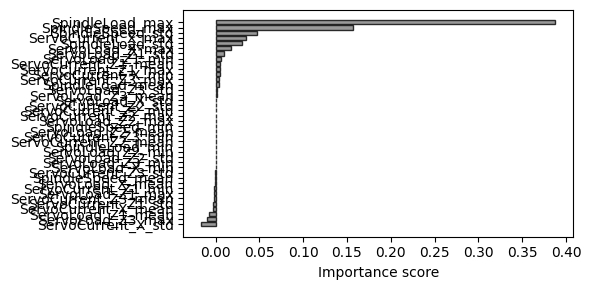

In [49]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(6, 3))
ax.barh(imp.index, imp['Importance'], height=0.8, facecolor='grey', alpha=0.8, edgecolor='k')
ax.set_xlabel('Importance score')
plt.gca().invert_yaxis()
fig.tight_layout()

- GridSearchCV

 - scoring
  - 'r2'	결정계수 (기본 회귀 평가지표)	클수록 좋음 (최대 1)
  - 'neg_mean_squared_error'	평균 제곱 오차(MSE)의 음수	작을수록 좋음 (음수 값이 덜 작을수록 좋음)
  - 'neg_root_mean_squared_error'	RMSE의 음수	↑
  - 'neg_mean_absolute_error'	평균 절대 오차(MAE)의 음수	↑
  - 'neg_median_absolute_error'	중앙 절대 오차의 음수	↑
  - 'explained_variance'	분산 설명률	클수록 좋음

In [50]:
from sklearn import model_selection

params = {
    "n_estimators":[50,100],
    "max_depth":[3,5,7]
}

#declaring GridSearchCV model
model = model_selection.GridSearchCV(
    estimator = rf,
    param_grid = params,
    scoring = 'neg_mean_squared_error',
    verbose = 10,
    n_jobs = 1,
    cv = 3
)


model.fit(X_train,y_train)


Fitting 3 folds for each of 6 candidates, totalling 18 fits
[CV 1/3; 1/6] START max_depth=3, n_estimators=50................................
[CV 1/3; 1/6] END max_depth=3, n_estimators=50;, score=-0.011 total time=   0.3s
[CV 2/3; 1/6] START max_depth=3, n_estimators=50................................
[CV 2/3; 1/6] END max_depth=3, n_estimators=50;, score=-0.006 total time=   0.4s
[CV 3/3; 1/6] START max_depth=3, n_estimators=50................................
[CV 3/3; 1/6] END max_depth=3, n_estimators=50;, score=-0.005 total time=   0.3s
[CV 1/3; 2/6] START max_depth=3, n_estimators=100...............................
[CV 1/3; 2/6] END max_depth=3, n_estimators=100;, score=-0.011 total time=   0.4s
[CV 2/3; 2/6] START max_depth=3, n_estimators=100...............................
[CV 2/3; 2/6] END max_depth=3, n_estimators=100;, score=-0.006 total time=   0.2s
[CV 3/3; 2/6] START max_depth=3, n_estimators=100...............................
[CV 3/3; 2/6] END max_depth=3, n_estimators=100

GridSearchCV(cv=3, estimator=RandomForestRegressor(n_jobs=-1), n_jobs=1,
             param_grid={'max_depth': [3, 5, 7], 'n_estimators': [50, 100]},
             scoring='neg_mean_squared_error', verbose=10)

In [51]:
#printing the best possible values to enhance accuracy
print(model.best_params_)
print(model.best_estimator_)
#printing the best score
print(model.best_score_)

{'max_depth': 7, 'n_estimators': 50}
RandomForestRegressor(max_depth=7, n_estimators=50, n_jobs=-1)
-0.0063877890948456076


#2. 차원축소-주성분 분석 + 회귀

- 데이터셋 개요
 - ID: 차량 테스트 고유 식별자 (정수형)
 - y: 테스트 벤치에서 소요된 시간(초 단위, 실수형) — 회귀의 타깃 변수
 - X0 ~ X8: 8개의 익명화된 범주형(categorical) 변수, 문자열 형태 (예: 'a', 'b', 'c', …)
 - X9 ~ X385: 약 368개의 이진(binary) 변수, 0 또는 1의 값을 가짐. 차량의 특정 기능이 있는지 여부를 나타냄
 - 총 변수 수: ID + y + 8 범주형 + 368 이진 = 378개 컬럼


In [95]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [96]:
df_train= pd.read_csv('train.csv')
df_test= pd.read_csv('test.csv')
print(df_test.shape)
print(df_train.shape)

(4209, 377)
(4209, 378)


In [97]:
df_train.head(6)

,ID,y,X0,X1,X2,X3,X4,X5,X6,X8,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,0,130.81,k,v,at,a,d,u,j,o,...,0,0,1,0,0,0,0,0,0,0
1,6,88.53,k,t,av,e,d,y,l,o,...,1,0,0,0,0,0,0,0,0,0
2,7,76.26,az,w,n,c,d,x,j,x,...,0,0,0,0,0,0,1,0,0,0
3,9,80.62,az,t,n,f,d,x,l,e,...,0,0,0,0,0,0,0,0,0,0
4,13,78.02,az,v,n,f,d,h,d,n,...,0,0,0,0,0,0,0,0,0,0
5,18,92.93,t,b,e,c,d,g,h,s,...,0,0,1,0,0,0,0,0,0,0


- 분산이 0인 컬럼 제거

In [98]:
df_train.dtypes[0:20]

,0
ID,int64
y,float64
X0,object
X1,object
X2,object
X3,object
X4,object
X5,object
X6,object
X8,object


In [99]:
df_train.describe()

,ID,y,X10,X11,X12,X13,X14,X15,X16,X17,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
count,4209.000000,4209.000000,4209.000000,4209.0,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,...,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000
mean,4205.960798,100.669318,0.013305,0.0,0.075077,0.057971,0.428130,0.000475,0.002613,0.007603,...,0.318841,0.057258,0.314802,0.020670,0.009503,0.008078,0.007603,0.001663,0.000475,0.001426
std,2437.608688,12.679381,0.114590,0.0,0.263547,0.233716,0.494867,0.021796,0.051061,0.086872,...,0.466082,0.232363,0.464492,0.142294,0.097033,0.089524,0.086872,0.040752,0.021796,0.037734
min,0.000000,72.110000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2095.000000,90.820000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,4220.000000,99.150000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,6314.000000,109.010000,0.000000,0.0,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,8417.000000,265.320000,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [101]:
df_test.shape

(4209, 377)

In [102]:
train_data=np.var(df_train.iloc[:,10:], axis=0)
train_data

,0
X10,0.013128
X11,0.000000
X12,0.069441
X13,0.054610
X14,0.244835
...,...
X380,0.008013
X382,0.007545
X383,0.001660
X384,0.000475


In [103]:
test_data=np.var(df_test.iloc[:,9:], axis=0)
test_data

,0
X10,0.018646
X11,0.000238
X12,0.068834
X13,0.057331
X14,0.244801
...,...
X380,0.008013
X382,0.008713
X383,0.000475
X384,0.000712


In [104]:
train_name=[]
for i in range(0,368):
    if(train_data[i]==0):
        train_name.append(train_data.index[i])
print(train_name)

['X11', 'X93', 'X107', 'X233', 'X235', 'X268', 'X289', 'X290', 'X293', 'X297', 'X330', 'X347']


<ipython-input-104-2737687107>:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if(train_data[i]==0):


In [105]:
test_name=[]
for i in range(0,351):
    if(test_data[i]==0):
        test_name.append(test_data.index[i])
print(test_name)

['X257', 'X258', 'X295', 'X296']


<ipython-input-105-2695378947>:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if(test_data[i]==0):


In [106]:
df_train.drop(train_name,axis=1, inplace=True)
df_train.drop(test_name,axis=1, inplace=True)

In [107]:
df_test.drop(train_name,axis=1, inplace=True)
df_test.drop(test_name,axis=1, inplace=True)

In [108]:
print(df_train.shape)
print(df_test.shape)

(4209, 362)
(4209, 361)


- 결측치 및 값 확인

In [110]:
for i,j in zip(df_train.columns,df_train.isnull().sum()):
    if(j!=0):
        print(i)

In [111]:
for i,j in zip(df_test.columns,df_test.isnull().sum()):
    if(j!=0):
        print(i)

In [112]:
train_desc=df_train.describe(include='O')
df_train.describe(include='O')

,X0,X1,X2,X3,X4,X5,X6,X8
count,4209,4209,4209,4209,4209,4209,4209,4209
unique,47,27,44,7,4,29,12,25
top,z,aa,as,c,d,v,g,j
freq,360,833,1659,1942,4205,231,1042,277


In [113]:
train_desc.columns

Index(['X0', 'X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X8'], dtype='object')

In [114]:
test_desc=df_test.describe(include='O')
df_train.describe(include='O')

,X0,X1,X2,X3,X4,X5,X6,X8
count,4209,4209,4209,4209,4209,4209,4209,4209
unique,47,27,44,7,4,29,12,25
top,z,aa,as,c,d,v,g,j
freq,360,833,1659,1942,4205,231,1042,277


In [115]:
test_desc.columns

Index(['X0', 'X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X8'], dtype='object')

In [116]:
for i in ['X0', 'X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X8']:
    print('df_train')
    print(i, df_train[i].unique())
    print('df_test')
    print(i, df_test[i].unique())

df_train
X0 ['k' 'az' 't' 'al' 'o' 'w' 'j' 'h' 's' 'n' 'ay' 'f' 'x' 'y' 'aj' 'ak' 'am'
 'z' 'q' 'at' 'ap' 'v' 'af' 'a' 'e' 'ai' 'd' 'aq' 'c' 'aa' 'ba' 'as' 'i'
 'r' 'b' 'ax' 'bc' 'u' 'ad' 'au' 'm' 'l' 'aw' 'ao' 'ac' 'g' 'ab']
df_test
X0 ['az' 't' 'w' 'y' 'x' 'f' 'ap' 'o' 'ay' 'al' 'h' 'z' 'aj' 'd' 'v' 'ak'
 'ba' 'n' 'j' 's' 'af' 'ax' 'at' 'aq' 'av' 'm' 'k' 'a' 'e' 'ai' 'i' 'ag'
 'b' 'am' 'aw' 'as' 'r' 'ao' 'u' 'l' 'c' 'ad' 'au' 'bc' 'g' 'an' 'ae' 'p'
 'bb']
df_train
X1 ['v' 't' 'w' 'b' 'r' 'l' 's' 'aa' 'c' 'a' 'e' 'h' 'z' 'j' 'o' 'u' 'p' 'n'
 'i' 'y' 'd' 'f' 'm' 'k' 'g' 'q' 'ab']
df_test
X1 ['v' 'b' 'l' 's' 'aa' 'r' 'a' 'i' 'p' 'c' 'o' 'm' 'z' 'e' 'h' 'w' 'g' 'k'
 'y' 't' 'u' 'd' 'j' 'q' 'n' 'f' 'ab']
df_train
X2 ['at' 'av' 'n' 'e' 'as' 'aq' 'r' 'ai' 'ak' 'm' 'a' 'k' 'ae' 's' 'f' 'd'
 'ag' 'ay' 'ac' 'ap' 'g' 'i' 'aw' 'y' 'b' 'ao' 'al' 'h' 'x' 'au' 't' 'an'
 'z' 'ah' 'p' 'am' 'j' 'q' 'af' 'l' 'aa' 'c' 'o' 'ar']
df_test
X2 ['n' 'ai' 'as' 'ae' 's' 'b' 'e' 'ak' 'm' 'a' 'aq' 'ag' 'r' 'k' 'a

- 원핫 인코딩 적용

In [125]:
df_train_x= df_train.drop(['ID','y'], axis=1)
df_train_y=df_train['y']

In [126]:
print(df_train_x.shape)
print(df_train_y.shape)

(4209, 360)
(4209,)


In [127]:
df_test_x= df_test.drop(['ID'], axis=1)

In [128]:
print(df_test_x.shape)
print(df_test_x.shape)

(4209, 360)
(4209, 360)


In [129]:
df_train_x = pd.get_dummies(df_train_x, columns=['X1','X2','X3','X4','X5','X6','X0', 'X8'])
df_test_x = pd.get_dummies(df_test_x, columns=['X1','X2','X3','X4','X5','X6','X0', 'X8'])

In [130]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(df_train_x,df_train_y, test_size=0.25, random_state=10)
print(xtrain.shape,ytrain.shape)
print(xtest.shape,ytest.shape)

(3156, 547) (3156,)
(1053, 547) (1053,)


- 차원 축소

In [131]:
from sklearn.decomposition import PCA

In [132]:
pca =PCA(n_components=0.99, random_state=102)
xtrain_trans=pca.fit_transform(xtrain)
xtest_trans=pca.transform(xtest)
print(xtrain.shape)
print(xtrain_trans.shape)
print(xtest.shape)
print(xtest_trans.shape)

(3156, 547)
(3156, 217)
(1053, 547)
(1053, 217)


In [133]:
pca =PCA(n_components=0.99, random_state=102)
df_train_trans=pca.fit_transform(df_train_x)
print(df_train_x.shape)
print(df_train_trans.shape)

(4209, 547)
(4209, 219)


- ML 회귀

In [134]:
from xgboost import XGBRegressor
from sklearn.metrics import accuracy_score

- colsample_bytree	0.5	(기본값:1) : 각 트리 생성 시 사용하는 feature 비율을 50%로 감소시켜 과적합 방지
- learning_rate	0.05	(기본값:0.3) : 	학습률을 낮춰 점진적 학습 유도, 성능 향상 + 안정성 증가
- max_depth	8	(기본값:6) : 	복잡한 패턴 학습 가능, 단 과적합 위험 증가
min_child_weight	2	(기본값:1) : 	리프 노드 분할 최소 조건 증가로 과적합 방지 목적
- n_estimators	90(기본값:100)
- eta	0.003	(기본값:0.3) : 	learning_rate와 동일 기능, XGBoost 내부 파라미터이며, 낮게 설정하여 보수적 학습

In [143]:
xgb=XGBRegressor(colsample_bytree=0.5,learning_rate=0.05, n_estimators=90, random_state=2341, verbosity=0, eta=0.003)

In [144]:
xgb.fit(xtrain_trans,ytrain)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.5, device=None, early_stopping_rounds=None,
             enable_categorical=False, eta=0.003, eval_metric=None,
             feature_types=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.05, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=90,
             n_jobs=None, num_parallel_tree=None, ...)

In [145]:
ypred=xgb.predict(xtest_trans)
xgb.predict(xtest_trans)

array([ 93.013336,  93.09511 ,  80.034935, ..., 111.08184 ,  97.855934,
       106.5838  ], dtype=float32)

In [146]:
print(xgb.score(xtrain_trans,ytrain))
print(xgb.score(xtest_trans,ytest))

0.837518185418622
0.5079642807096778


- 테스트데이터 예측

In [ ]:
xgb.predict(df_train_trans)

- 여러 모형 비교

In [148]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor
from sklearn.metrics import r2_score

In [151]:
# 1. 모델 정의
models = {
    'SVR': SVR(kernel='rbf', C=10, epsilon=0.1),
    'ExtraTrees': ExtraTreesRegressor(n_estimators=100, random_state=42),
    'XGB': XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
}

# 2. 모델 학습 & 교차검증
for name, model in models.items():
    scores = cross_val_score(model, xtrain_trans, ytrain, cv=5, scoring='r2')
    print(f'{name} CV R²: {scores.mean():.4f} ± {scores.std():.4f}')

# 8. 모델 앙상블 (ExtraTrees + XGB 평균)
et = ExtraTreesRegressor(n_estimators=200, random_state=42)
xgb = XGBRegressor(n_estimators=200, learning_rate=0.05, random_state=42)
et.fit(xtrain_trans,ytrain)
xgb.fit(xtrain_trans,ytrain)
et_pred = et.predict(xtest_trans)
xgb_pred = xgb.predict(xtest_trans)
ensemble_pred = (et_pred + xgb_pred) / 2
print('Ensemble R²:', r2_score(ytest, ensemble_pred))

SVR CV R²: 0.5208 ± 0.0544
ExtraTrees CV R²: 0.4706 ± 0.0348
XGB CV R²: 0.4691 ± 0.0338
Ensemble R²: 0.5131799824639394


#3. 분류모형을 위한 전처리-Imbalanced

In [154]:
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
data = pd.read_csv("data_semiconductor.csv")
data.head()


,X20,X86,X87,X88,X113,X115,X116,X117,X119,X120,...,X527,X570,X571,X572,X573,X574,X575,X576,X577,Pass.Fail
0,1.4026,2.3895,0.9690,1747.6049,0.9460,748.6115,0.9908,58.4306,0.9804,6.3788,...,6.6926,533.8500,2.1113,8.95,0.3157,3.0624,0.1026,1.6765,14.9509,0
1,1.3825,2.3754,0.9894,1931.6464,0.9425,731.2517,0.9902,58.6680,0.9731,6.5061,...,8.8370,535.0164,2.4335,5.92,0.2653,2.0111,0.0772,1.1065,10.9003,0
2,1.4123,2.4532,0.9880,1685.8514,0.9231,718.5777,0.9899,58.4808,0.9772,6.4527,...,6.4568,535.0245,2.0293,11.21,0.1882,4.0923,0.0640,2.0952,9.2721,1
3,1.4011,2.4004,0.9904,1752.0968,0.9564,709.0867,0.9906,58.6635,0.9761,6.4935,...,6.4865,530.5682,2.0253,9.33,0.1738,2.8971,0.0525,1.7585,8.5831,0
4,1.3888,2.4530,0.9902,1828.3846,0.9424,796.5950,0.9908,58.3858,0.9628,6.3551,...,6.3745,532.0155,2.0275,8.83,0.2224,3.1776,0.0706,1.6597,10.9698,0


In [155]:
data["Pass.Fail"].value_counts()

,count
Pass.Fail,
0,1463
1,104


In [156]:
smote = SMOTE(sampling_strategy=0.4, k_neighbors=5)
X, y = smote.fit_resample(data.drop("Pass.Fail", axis=1), data["Pass.Fail"])

In [158]:
X.shape, y.shape

((2048, 48), (2048,))

In [160]:
smote = RandomUnderSampler(sampling_strategy=0.4) #다수 클래스의 샘플 수를 소수 클래스의 샘플 수의 0.4배만큼 남기
X, y = smote.fit_resample(data.drop("Pass.Fail", axis=1), data["Pass.Fail"])

In [161]:
X.shape, y.shape

((364, 48), (364,))

#3. 파일 읽고 처리, 폴더 다루기

In [164]:
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import os

In [ ]:
!unzip manufacturing.zip

In [174]:
import glob

def read_custom_csv(filepath):
    with open(filepath, 'r', encoding='utf-8') as f:
        lines = f.readlines()

    # 데이터가 시작되는 줄 번호 찾기 (e.g., 'Data Leng' 포함된 줄)
    start_idx = next(i for i, line in enumerate(lines) if "Data Length" in line) + 1

    # 시간 + 센서값 부분을 pandas로 읽기
    df = pd.read_csv(filepath, skiprows=start_idx, header=None)

    # 시간 컬럼 이름 지정
    num_columns = df.shape[1]
    col_names = ['time'] + [f'sensor_{i}' for i in range(1, num_columns)]
    df.columns = col_names
    return df

In [184]:
# 여러 파일 읽고 하나로 합치기
def read_file( base_dir):
  all_files = glob.glob(os.path.join(base_dir, "*.csv"))
  df_list = [read_custom_csv(f) for f in all_files]
  df_all = pd.concat(df_list, ignore_index=True)
  return df_all


In [190]:
base_dir = os.path.join("manufacturing", "벨트느슨함")
df1 = read_file(base_dir)
df1["target"] = "abnormal"
base_dir = os.path.join("manufacturing", "정상")
df2 = read_file(base_dir)
df2["target"] = "normal"

In [191]:
df_final = pd.concat([df1, df2], ignore_index=True)

In [192]:
df_final.shape

(502000, 6)